In [2]:
import numpy as np
from datetime import datetime
import os
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dict_1 = {}
dict_2 = {}
batting_team = 'Deccan Chargers'
x = glob.glob(r'C:\Users\aniru\Desktop\Season\*.csv')
l = []

In [4]:
def analysis_2(df,batting_team) :
    df = df[df['batting_team'] == batting_team]
    df = df.set_index(['batting_team'], drop = False)
    df['total_runs_all'] = sum(df['total_runs'])
#df['number_of_4s']
    df['percentage_from_6s'] = round(sum(df[df['batsman_runs'] == 6]['total_runs'])/df['total_runs_all']*100)
    df['percentage_from_4s'] = round(sum(df[df['batsman_runs'] == 4]['total_runs'])/df['total_runs_all']*100)
    df['percentage_from_extra'] = round(sum(df['extra_runs'])/df['total_runs_all']*100)
    df['runs_from_rest'] = 100 - df['percentage_from_6s'] - df['percentage_from_4s'] - df['percentage_from_extra']
    df = df[['season' ,'batting_team', 'percentage_from_6s', 'percentage_from_4s', 'percentage_from_extra' ,'runs_from_rest']]
    df = df.drop_duplicates()
    return df

In [5]:
x = glob.glob(r'C:\Users\aniru\Desktop\Season\*.csv')
appended_data = []
for i in x :
    df5 = pd.read_csv(i)
    df5 = analysis_2(df5, batting_team)
    appended_data.append(df5)
appended_data = pd.concat(appended_data, axis=0)
appended_data = appended_data.reset_index(drop = True)
y1 = appended_data.season.unique().tolist()

AttributeError: 'AxesSubplot' object has no attribute 'sns'

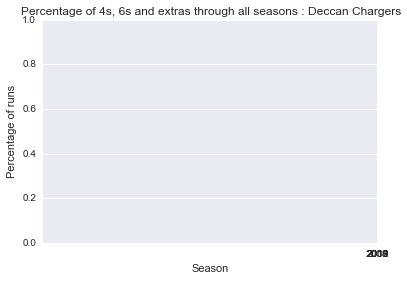

In [6]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
width = 0.20
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Percentage of 4s, 6s and extras through all seasons : ' + batting_team)
ax.set_ylabel('Percentage of runs')
ax.set_xlabel('Season')
ax.set_xticks(appended_data.season+width)
ax.set_xticklabels( appended_data.season.unique().tolist() )        

rects1 = ax.bar(appended_data.season, appended_data.percentage_from_6s, width, color='r')
rects2 = ax.bar(appended_data.season+width, appended_data.percentage_from_4s, width, color='g')
rects3 = ax.bar(appended_data.season+width*2, appended_data.percentage_from_extra, width, color='b')
rects4 = ax.bar(appended_data.season+width*3, appended_data.runs_from_rest, width, color='m')
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Percentage of 6s', 'Percentage of 4s', 'Percentage of extras','Percentage of runs scored(Execpt Boundaries)') )

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
plt.ylim([1,100])